In [202]:
#Importing the required libraries

import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
%matplotlib inline

from sklearn.preprocessing import StandardScaler,LabelEncoder

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
inscl=pd.read_csv('automobileinsuranceclaim.csv')
inscl.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [3]:
inscl['Response'].unique()

array(['No', 'Yes'], dtype=object)

In [4]:
#Checking datatypes..
inscl.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [5]:
#viewing all the unique records in all the columns

for col in inscl.columns:
    print(inscl[col].unique())
    

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['US']
['KS' 'NE' 'OK' 'MO' 'IA']
['Kansas' 'Nebraska' 'Oklahoma' 'Missouri' 'Iowa']
[ 276.3519279  697.9535903 1288.743165  ...  816.3890428  752.4442436
  261.1836866]
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
[

In [6]:
ins=inscl.copy()

In [7]:
#Checking the null values

ins.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
#checking missing values and replacing with nan

ins=ins.replace('?',np.nan)

In [9]:
ins.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [10]:
ins.columns.unique()

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
ins['Vehicle Size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [12]:
ins['State Code'].unique()

array(['KS', 'NE', 'OK', 'MO', 'IA'], dtype=object)

In [13]:
ins['State'].unique()

array(['Kansas', 'Nebraska', 'Oklahoma', 'Missouri', 'Iowa'], dtype=object)

In [14]:
#It seems statecode and state are same ,so we can drop either of them
#Country contains single unique record ,so dropping the country feature
##Customer feature is not helpful for claim amount analysis and prediction ,hence droppping the column

ins=ins.drop(['Country','State Code','Customer'],axis=1)

In [15]:
ins.head()

,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


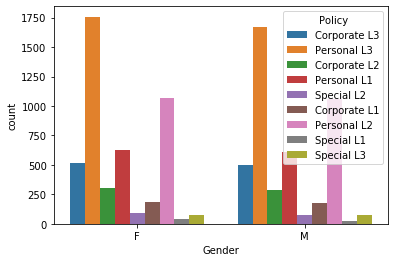

In [16]:
#Plotting policy type with the gender

sbn.countplot('Gender',hue='Policy',data=ins)

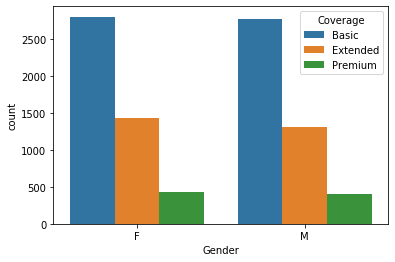

In [17]:
sbn.countplot('Gender',hue='Coverage',data=ins)

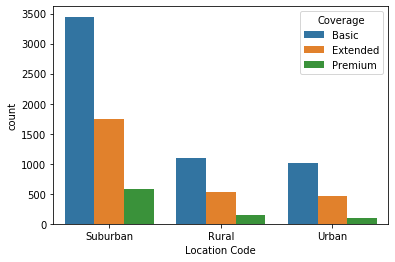

In [18]:
sbn.countplot('Location Code',hue='Coverage',data=ins)

It is observed that suburban location has more spread in the coverage

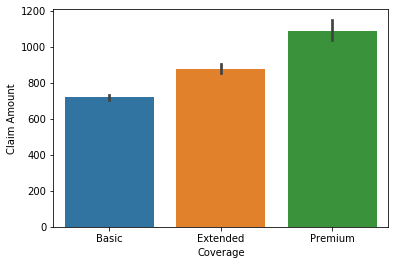

In [19]:
#coverage wise distribution of claim amount

sbn.barplot('Coverage','Claim Amount',data=ins)

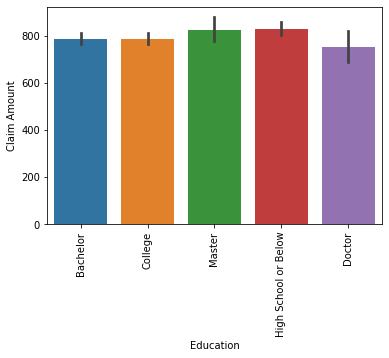

In [20]:
#Education vs claim amount
sbn.barplot('Education','Claim Amount',data=ins)
plt.xticks(rotation=90)
plt.show()

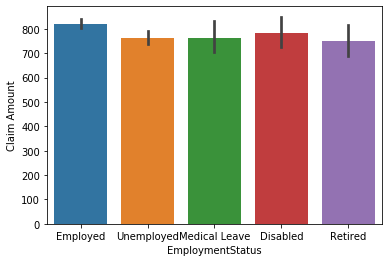

In [21]:
#visualization of employmentstatus and claim amount

sbn.barplot('EmploymentStatus','Claim Amount',data=ins)


It seems claim amount is high for employed category and retired being the least with respect to claim amount

In [22]:
ins.groupby('EmploymentStatus')['Claim Amount'].value_counts()

EmploymentStatus  Claim Amount
Disabled          235.942360      6
                  239.557000      6
                  395.434453      6
                  425.462067      6
                  509.667322      6
                                 ..
Unemployed        6055.619213     1
                  6113.468307     1
                  6185.018803     1
                  6461.875715     1
                  7422.851604     1
Name: Claim Amount, Length: 8041, dtype: int64

In [23]:
#checking highest claim amount and features of the records.

ins.nlargest(4,columns='Claim Amount')

,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
5716,Iowa,8332.538119,No,Extended,High School or Below,1/31/11,Employed,M,58958,Suburban,...,74,0,2,Personal Auto,Personal L3,Collision,Call Center,1108.800000,Luxury Car,Small
1974,Kansas,7422.851604,No,Extended,High School or Below,1/26/11,Unemployed,M,0,Suburban,...,34,0,2,Personal Auto,Personal L1,Collision,Branch,1742.400000,Luxury Car,Medsize
6252,Missouri,7322.595652,No,Extended,Bachelor,2/9/11,Employed,F,39547,Suburban,...,21,0,2,Personal Auto,Personal L3,Collision,Branch,969.600000,Luxury SUV,Medsize
7283,Iowa,6790.727050,No,Premium,Bachelor,2/5/11,Employed,M,78310,Rural,...,18,1,2,Personal Auto,Personal L1,Collision,Agent,151.711475,Sports Car,Medsize


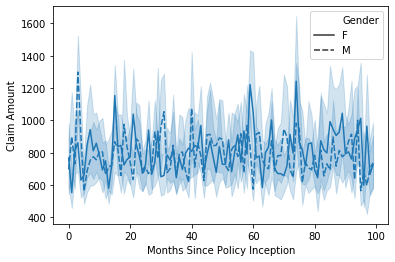

In [24]:
#claim amount according to month since policy inception.

sbn.lineplot('Months Since Policy Inception','Claim Amount',style='Gender',data=ins)


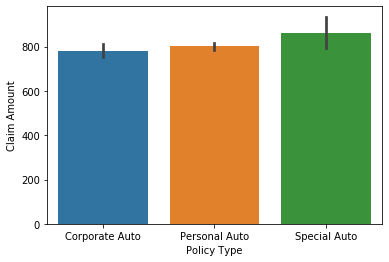

In [25]:

sbn.barplot('Policy Type','Claim Amount',data=ins)


The policy type indicates special auto is more widely spread in the claim amount

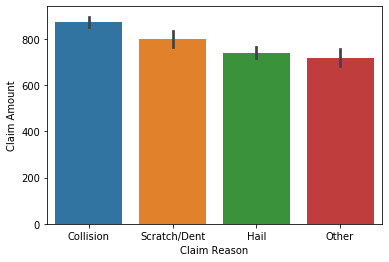

In [26]:
sbn.barplot('Claim Reason','Claim Amount',data=ins)


the claim amount for the collision category is  more compared to all other categories

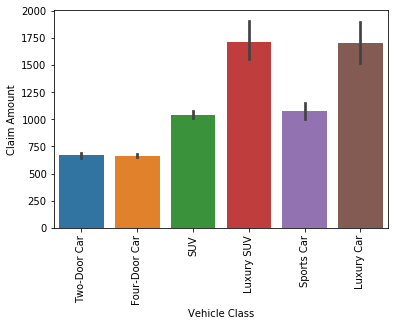

In [27]:
sbn.barplot('Vehicle Class','Claim Amount',data=ins)
plt.xticks(rotation=90)
plt.show()


claim amount plotted against vehicle class shows luxury segment has more claim amount

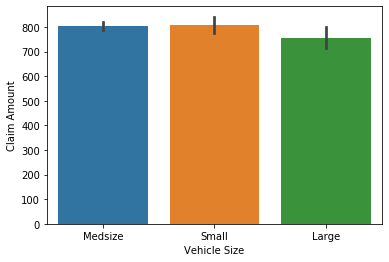

In [28]:
sbn.barplot('Vehicle Size','Claim Amount',data=ins)


Large vehicle size has comparitively less claim amount

# Looking for outliers

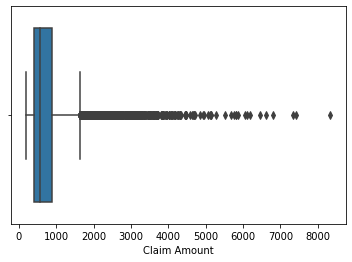

In [29]:
sbn.boxplot("Claim Amount",data=ins)

From the above plot ,we can observe that outliers are present in the claimamount.

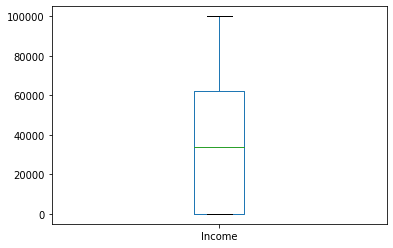

In [30]:
ins['Income'].plot.box()

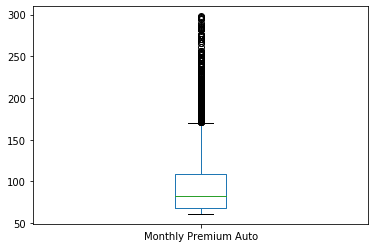

In [31]:
ins['Monthly Premium Auto'].plot.box()

we can observe that ouliers present in the feature

In [32]:
#Removing the columns effective to date as the whole spread of data belongs to same year

ins=ins.drop('Effective To Date',axis=1)

In [33]:
ins.head()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


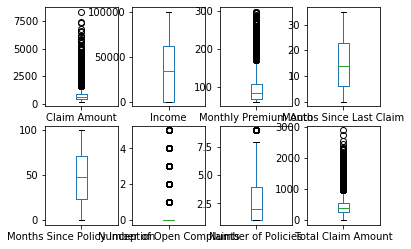

In [34]:
ins.plot(kind='box',subplots=True,layout=(2,4))
plt.show()

It shows there are outliers present in multiple columns.

In [35]:
ins.columns

Index(['State', 'Claim Amount', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [36]:
#appending the object dtypes into a list

objc=[]

for col in ins.columns:
    if ins[col].dtype=='object':
        objc.append(col)

In [37]:
objc

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Claim Reason',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [38]:
#Converting object columns into integer using label encoder

for col in ins.columns:
    if ins[col].dtype=='object':
        ins[col]=LabelEncoder().fit_transform(ins[col])

In [39]:
ins.head()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,276.351928,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,3,697.953590,0,1,0,4,0,0,1,2,...,42,0,8,1,5,3,0,1131.464935,0,1
2,4,1288.743165,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,2,764.586183,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,1,281.369258,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1


In [40]:
ins.describe()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,1.722684,800.494047,0.143201,0.480622,1.554084,1.825706,0.490037,37657.380009,0.979089,1.120210,...,48.064594,0.384388,2.966170,0.825925,3.797788,1.014889,1.102693,434.088794,1.892380,1.089556
std,1.312397,687.096761,0.350297,0.655817,1.381978,1.347793,0.499928,30379.904734,0.605732,0.636838,...,27.905991,0.910384,2.390182,0.475989,1.605978,1.072331,1.069452,290.500092,2.072992,0.537313
min,0.000000,189.800768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.099007,0.000000,0.000000
25%,0.000000,399.425179,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,24.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,272.258244,0.000000,1.000000
50%,2.000000,578.018220,0.000000,0.000000,1.000000,1.000000,0.000000,33889.500000,1.000000,1.000000,...,48.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,383.945434,0.000000,1.000000
75%,3.000000,896.216704,0.000000,1.000000,3.000000,4.000000,1.000000,62320.000000,1.000000,2.000000,...,71.000000,0.000000,4.000000,1.000000,5.000000,2.000000,2.000000,547.514839,4.000000,1.000000
max,4.000000,8332.538119,1.000000,2.000000,4.000000,4.000000,1.000000,99981.000000,2.000000,2.000000,...,99.000000,5.000000,9.000000,2.000000,8.000000,3.000000,3.000000,2893.239678,5.000000,2.000000


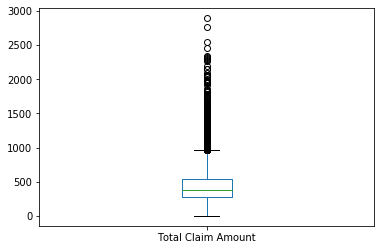

In [41]:
ins['Total Claim Amount'].plot.box()

There are ouliers present in the feature

In [42]:
ins_n=ins.copy()
sbn.pairplot(ins_n

SyntaxError: unexpected EOF while parsing (<ipython-input-42-6f78a36fd46c>, line 2)

In [43]:
##removing outliers

zsc=np.abs(zscore(ins))

In [44]:
#the standard threshold for removing outliers is generally 3,so setting 3 as threshold

threshold=3
print(np.where(zsc>3))

(array([  31,   50,   51,   79,   86,  125,  181,  185,  196,  196,  232,
        243,  244,  248,  248,  266,  274,  281,  292,  303,  315,  316,
        373,  375,  385,  386,  403,  404,  404,  407,  408,  418,  425,
        435,  444,  496,  496,  510,  512,  522,  522,  541,  541,  554,
        581,  581,  626,  633,  645,  680,  681,  702,  727,  749,  755,
        757,  810,  814,  817,  820,  832,  832,  832,  836,  840,  856,
        869,  873,  888,  888,  899,  914,  926,  944,  949, 1002, 1008,
       1011, 1046, 1046, 1058, 1071, 1078, 1078, 1109, 1113, 1120, 1133,
       1158, 1174, 1179, 1184, 1200, 1212, 1233, 1240, 1283, 1292, 1292,
       1300, 1305, 1312, 1312, 1319, 1330, 1364, 1382, 1383, 1383, 1384,
       1392, 1393, 1408, 1421, 1429, 1436, 1466, 1504, 1506, 1516, 1516,
       1521, 1529, 1534, 1541, 1552, 1552, 1555, 1558, 1592, 1626, 1640,
       1657, 1687, 1795, 1796, 1796, 1809, 1812, 1819, 1819, 1823, 1824,
       1850, 1858, 1858, 1859, 1861, 1881, 1881, 1

In [45]:
zsc[31][10]

4.178932721080021

In [46]:
#outliers being removed..
ins_n=ins[(zsc<3).all(axis=1)]

In [47]:
#Checing skewness..

ins_n.skew()

State                            0.019194
Claim Amount                     1.848796
Response                         2.030625
Coverage                         1.080580
Education                        0.337866
EmploymentStatus                 0.844023
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             1.330466
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        2.574570
Number of Policies               1.226531
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.725402
Sales Channel                    0.503296
Total Claim Amount               0.709643
Vehicle Class                    0.403978
Vehicle Size                     0.071461
dtype: float64

In [50]:
#Treating skewness of the data..

for col in ins_n.columns:
    if ins_n.skew().loc[col]>0.55:
        ins_n[col]=np.log1p(ins_n[col])
for col in ins_n.columns:
    if ins_n.skew().loc[col]<-0.55:
        ins_n[col]=np.cbrt(ins_n[col])

In [51]:
#Checking skewness again

ins_n.skew()

State                            0.019194
Claim Amount                     0.359738
Response                         2.030625
Coverage                         0.633709
Education                        0.337866
EmploymentStatus                 0.405261
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             0.610522
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        1.831256
Number of Policies               0.392925
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.213051
Sales Channel                    0.503296
Total Claim Amount              -4.029922
Vehicle Class                    0.403978
Vehicle Size                     0.071461
dtype: float64

In [52]:
##checking the correlation matrix

ins_n.corr()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
State,1.000000,-0.011812,-0.002620,0.012462,0.007384,0.000463,-0.001724,0.000878,-0.000077,-0.006616,...,-0.006412,0.017909,-0.010732,-0.008292,-0.013297,0.005888,0.000664,0.006111,-0.005447,-0.001443
Claim Amount,-0.011812,1.000000,0.008758,0.194507,0.016745,-0.049239,-0.009449,0.046336,0.001035,-0.038283,...,-0.012157,-0.016028,0.413275,0.014951,0.010708,-0.093923,-0.021969,0.078164,0.097608,0.010958
Response,-0.002620,0.008758,1.000000,-0.007579,0.006542,-0.004718,0.015157,0.013171,0.002064,-0.079423,...,-0.010857,-0.029382,-0.024998,-0.000504,-0.004152,-0.125953,-0.082354,0.055349,0.025832,-0.055123
Coverage,0.012462,0.194507,-0.007579,1.000000,0.021798,0.005799,-0.019354,-0.015982,-0.017250,-0.002910,...,0.005544,-0.006191,-0.016413,0.000916,-0.004223,-0.033345,-0.024763,0.121427,-0.019320,-0.017311
Education,0.007384,0.016745,0.006542,0.021798,1.000000,-0.024899,0.001048,0.017016,-0.015903,0.003817,...,0.006695,-0.014382,0.002619,0.016969,0.015148,0.058425,-0.001515,0.005069,0.011328,-0.007451
EmploymentStatus,0.000463,-0.049239,-0.004718,0.005799,-0.024899,1.000000,0.037642,-0.653807,0.013489,0.292947,...,0.015143,0.014109,0.009066,-0.002254,0.000816,-0.110767,-0.017821,0.223221,-0.004995,-0.011493
Gender,-0.001724,-0.009449,0.015157,-0.019354,0.001048,0.037642,1.000000,-0.010147,0.002068,0.027457,...,0.003434,-0.006392,0.019084,-0.002108,-0.000988,0.038102,-0.020444,0.064641,0.020086,-0.000141
Income,0.000878,0.046336,0.013171,-0.015982,0.017016,-0.653807,-0.010147,1.000000,-0.023884,-0.228589,...,0.004966,-0.000358,-0.007611,0.005000,0.006729,0.144909,0.010028,-0.290009,0.005757,0.005528
Location Code,-0.000077,0.001035,0.002064,-0.017250,-0.015903,0.013489,0.002068,-0.023884,1.000000,0.022175,...,0.006588,-0.017980,0.004686,0.015965,0.014569,-0.013912,0.000276,0.480935,0.003219,0.022922
Marital Status,-0.006616,-0.038283,-0.079423,-0.002910,0.003817,0.292947,0.027457,-0.228589,0.022175,1.000000,...,-0.027677,0.007576,0.012572,0.014379,0.010158,-0.034357,-0.016246,0.123696,0.015021,0.020931


The claim amount is more positively correlated with no.of policies and monthly premium compared to others.

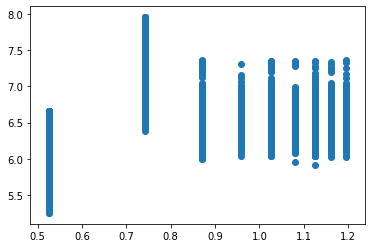

In [53]:
#scatter plot for claim amount and no.of policies

plt.scatter('Number of Policies','Claim Amount',data=ins_n)

In [54]:
#Seperating features and label

x=ins_n.drop(columns=['Claim Amount'],axis=1)
y=ins_n['Claim Amount']

In [55]:
x.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,0.0,0.000000,0,0.693147,0,56274,1,1,1.657941,...,5,0.0,0.526589,0,2,0.000000,0,1.219273,5,1
1,3,0.0,0.526589,0,1.609438,0,0,1,2,1.714496,...,42,0.0,1.162283,1,5,1.386294,0,1.241998,0,1
2,4,0.0,0.741276,0,0.693147,0,48767,1,1,1.738947,...,38,0.0,0.741276,1,5,0.000000,0,1.227807,5,1
3,2,0.0,0.000000,0,1.609438,1,0,1,1,1.735688,...,65,0.0,1.124748,0,1,0.000000,2,1.226366,3,1
4,1,0.0,0.000000,0,0.693147,1,43836,0,2,1.668474,...,44,0.0,0.526589,1,3,0.000000,0,1.194087,0,1


In [56]:
#bringing all the features to a common scale

sc=StandardScaler()
x=sc.fit_transform(x)

In [57]:
def r2score(model,x,y):
    max_acc=0
    for rst in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rst,test_size=.22)
        model.fit(x_train,y_train)
        predy=model.predict(x_test)
        acc=r2_score(y_test,predy)
        print('Accuracy is',acc,'for the random state',rst)
        if acc>max_acc:
            max_acc=acc
            f_rst=rst
    print('Maximum r2score is ',max_acc,'and acquired at',f_rst)
    return f_rst

In [58]:
dtr=DecisionTreeRegressor()
params={'criterion': ['mse'],
 'max_depth': [None],
 'max_features': [None],
 'max_leaf_nodes': [4,8,16],
 'min_impurity_decrease': [0.0],
 'min_impurity_split': [None],
 'min_samples_leaf': [1,2,4],
 'min_samples_split': [2,4],
 'min_weight_fraction_leaf': [0.0],
 'presort': [False],
 'random_state': [None],
 'splitter': ['best']}


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(estimator=dtr,param_grid=params)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 16,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [60]:
dtr=DecisionTreeRegressor(criterion='mse',
 max_leaf_nodes=16,
 min_impurity_decrease=0.0,
 min_samples_leaf= 1,
 min_samples_split=2,
 splitter='best')
dtr.fit(x_train,y_train)
dtrpr=dtr.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,dtrpr))
print('Mean Squared Error:',mean_squared_error(y_test,dtrpr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dtrpr)))
print('R2 sCcore is:',r2_score(y_test,dtrpr))

Mean Absolute Error: 0.11856651700740316
Mean Squared Error: 0.03394134290535107
Root Mean Squared Error: 0.18423176410530046
R2 sCcore is: 0.9014296607291002


In [61]:
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
predm=model.predict(x_test)
print('mean r2 score for gradient boosting regressor is',cross_val_score(model,x_train,y_train,cv=5,scoring='r2').mean())

mean r2 score for gradient boosting regressor is 0.9116080589723715


In [62]:
Lr=LinearRegression()
r2score(Lr,x,y)

Accuracy is 0.3225137789799245 for the random state 40
Accuracy is 0.3416252423863819 for the random state 41
Accuracy is 0.34860622404568054 for the random state 42
Accuracy is 0.3469227862361006 for the random state 43
Accuracy is 0.30717259558932253 for the random state 44
Accuracy is 0.35163111800071345 for the random state 45
Accuracy is 0.3177283616845197 for the random state 46
Accuracy is 0.3197627926482749 for the random state 47
Accuracy is 0.33945575091691005 for the random state 48
Accuracy is 0.32165513160940085 for the random state 49
Accuracy is 0.3451233645713164 for the random state 50
Accuracy is 0.30404688195473795 for the random state 51
Accuracy is 0.32660603092051377 for the random state 52
Accuracy is 0.3265808477073098 for the random state 53
Accuracy is 0.32850635304805187 for the random state 54
Accuracy is 0.28946599101350945 for the random state 55
Accuracy is 0.3247830025719486 for the random state 56
Accuracy is 0.30526438142091605 for the random state 57


83

In [63]:
r2score(dtr,x,y)

Accuracy is 0.8915018360005922 for the random state 40
Accuracy is 0.9021592799852601 for the random state 41
Accuracy is 0.9053517883079949 for the random state 42
Accuracy is 0.8961996821818868 for the random state 43
Accuracy is 0.8929519585951262 for the random state 44
Accuracy is 0.9014296607291005 for the random state 45
Accuracy is 0.8909321597307377 for the random state 46
Accuracy is 0.8981631970577937 for the random state 47
Accuracy is 0.8982685143573294 for the random state 48
Accuracy is 0.8986086797087218 for the random state 49
Accuracy is 0.8959856745594637 for the random state 50
Accuracy is 0.8909385227592308 for the random state 51
Accuracy is 0.8965055263819517 for the random state 52
Accuracy is 0.8973740980493295 for the random state 53
Accuracy is 0.8991217712446852 for the random state 54
Accuracy is 0.8886147193708349 for the random state 55
Accuracy is 0.8956378477771766 for the random state 56
Accuracy is 0.8928040693216962 for the random state 57
Accuracy i

42

In [64]:
rfr=RandomForestRegressor()
r2score(rfr,x,y)

Accuracy is 0.9127607287987396 for the random state 40
Accuracy is 0.9196143065832056 for the random state 41
Accuracy is 0.91427377888658 for the random state 42
Accuracy is 0.9181047181405656 for the random state 43
Accuracy is 0.9079770602913284 for the random state 44
Accuracy is 0.9191464608259696 for the random state 45
Accuracy is 0.9103368499586 for the random state 46
Accuracy is 0.9174881299462646 for the random state 47
Accuracy is 0.9178854821037004 for the random state 48
Accuracy is 0.9194337130336692 for the random state 49
Accuracy is 0.9101243578850221 for the random state 50
Accuracy is 0.9107951595092839 for the random state 51
Accuracy is 0.9134148796334226 for the random state 52
Accuracy is 0.9053939519465843 for the random state 53
Accuracy is 0.9156698746479477 for the random state 54
Accuracy is 0.9098210209602564 for the random state 55
Accuracy is 0.9155430768620493 for the random state 56
Accuracy is 0.9143727013452526 for the random state 57
Accuracy is 0.9

58

In [65]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':[10,100,300]}
gcv=GridSearchCV(estimator=knr,param_grid=parameters)
gcv.fit(x_train,y_train)
print(gcv.best_params_)
print(gcv.best_score_)

{'n_neighbors': 10}
0.3056218193042561


Kneighbors regression isn't performing well than other algorithms ,so rejecting it 

In [66]:
#As Random forest is performing well than others ,fitting it as final model

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rfp=rf.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,rfp))
print('Mean Squared Error:',mean_squared_error(y_test,rfp))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rfp)))
print('R2 sCcore is:',r2_score(y_test,rfp))

Mean Absolute Error: 0.07325387892512626
Mean Squared Error: 0.027116100233876814
Root Mean Squared Error: 0.16466967004848468
R2 sCcore is: 0.9212511064394104


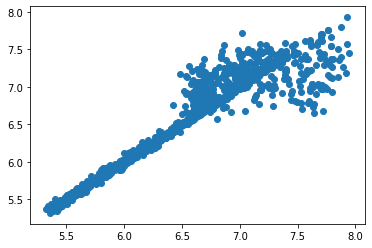

In [67]:
#plotting  the results of actual vs predicted

plt.scatter(y_test,rfp)
plt.show()

In [72]:
rfpredicted=pd.DataFrame(rfp,columns=['automobileinsclaimspredictions'])

In [73]:
rfpredicted.head()

,automobileinsclaimspredictions
0,6.886514
1,7.016110
2,6.010775
3,5.677401
4,7.297640


In [74]:
y_test.head()

3827    6.902668
2130    7.522114
1551    5.967437
436     5.672264
6537    6.947525
Name: Claim Amount, dtype: float64

In [75]:
#Saving to csv

rfpredicted.to_csv('predictedautoinsclaim.csv',index=False)


In [78]:
#Saving model
import joblib
joblib.dump(rf,'predictedautoinsclaim.pkl')

['predictedautoinsclaim.pkl']

# Automobile ins fraud prediction

In [81]:
insfr=pd.read_csv('automobileinsurancefraud.csv')


In [82]:
insfr.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [83]:
insfr.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [84]:
insfr['insured_hobbies']

0            sleeping
1             reading
2         board-games
3         board-games
4         board-games
            ...      
995         paintball
996          sleeping
997    bungie-jumping
998      base-jumping
999          kayaking
Name: insured_hobbies, Length: 1000, dtype: object

In [91]:
#there are some fetures which are not helpful for the classification ,so dropping them right away

insfr=insfr.drop(['insured_hobbies','_c39','policy_bind_date'],axis=1)

In [87]:
insfr['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [89]:
insfr['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [92]:
insfr.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [106]:
#seperating the label and transforming using Label Encoder so that system can understand
insfrn=insfr.copy()
y=insfrn['fraud_reported']
lenc=LabelEncoder()
y=pd.DataFrame(lenc.fit_transform(y),columns=['Fraud'])

In [107]:
y.head()

,Fraud
0,1
1,1
2,0
3,1
4,0


In [108]:
insfr=insfr.drop('fraud_reported',axis=1)

In [116]:
insfrn.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [118]:
insf=insfrn.copy()

In [119]:
insf.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [120]:
insfrn=pd.concat([insfrn,y],axis=1)
insfrn.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Fraud
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,0
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,0


In [121]:
insfrn.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'Fraud'],
      dtype='object')

In [ ]:
#As fraud_reported and Fraud are same columns ,dropping fraud_reported

insfrn=insfrn.drop(['fraud_reported'],axis=1)

In [123]:
insfrn.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Fraud
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [124]:
#Lets check for missing(?),null  values

insfrn.isnull().sum()


months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [126]:
#Lets check for (?) values

for col in insfrn.columns:
    print(insfrn[col].unique())

[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309 396 273 419 315  7

In [131]:
#Replacing (?) values with nan and treating..

insfrn=insfrn.replace('?',np.nan)

In [132]:
insfrn.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [137]:
#Finding out the values to be filled 
print(insfrn['collision_type'].unique())
print(insfrn['collision_type'].value_counts())

['Side Collision' nan 'Rear Collision' 'Front Collision']
Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


Replacing with  the model of collision type

In [138]:
insfrn['collision_type'].fillna(insfrn['collision_type'].mode()[0],inplace=True)


In [139]:
print(insfrn['property_damage'].unique())
print(insfrn['property_damage'].value_counts())

['YES' nan 'NO']
NO     338
YES    302
Name: property_damage, dtype: int64


In [140]:
#Replacing with the mode of property damage

insfrn['property_damage'].fillna(insfrn['property_damage'].mode()[0],inplace=True)


In [141]:
print(insfrn['police_report_available'].unique())
print(insfrn['police_report_available'].value_counts())

['YES' nan 'NO']
NO     343
YES    314
Name: police_report_available, dtype: int64


In [142]:
#Imputing the missing values with mode

insfrn['police_report_available'].fillna(insfrn['police_report_available'].mode()[0],inplace=True)


In [143]:
insfrn.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [144]:
insfrn.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Fraud
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


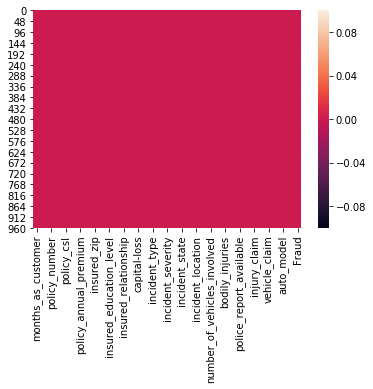

In [169]:
sbn.heatmap(insfrn.isnull())

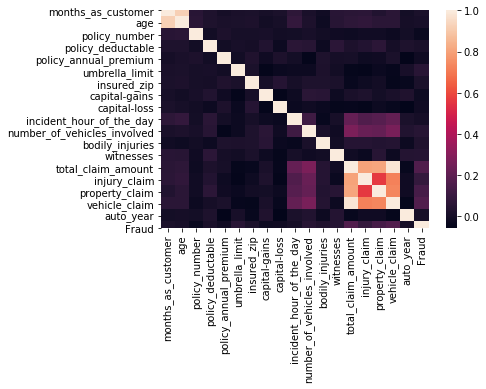

In [170]:
sbn.heatmap(insfrn.corr())

The heatmap shows most of the features are not correlated.

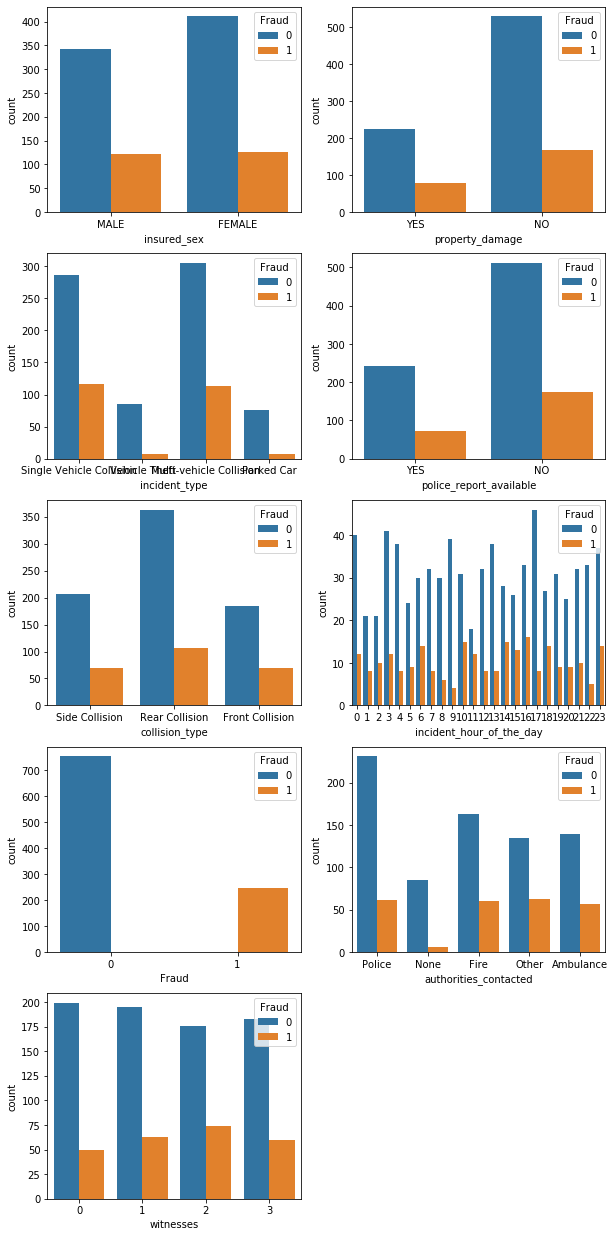

In [158]:
#Visualizing the relation between multiple columns with respect to fraud

i=insfrn[['insured_sex','property_damage','incident_type','police_report_available','collision_type','incident_hour_of_the_day','Fraud','authorities_contacted','witnesses']]
plt.figure(figsize=(10,90))
for ci,col in enumerate(i.columns):
    plt.subplot(20,2,ci+1)
    plt.xticks(rotation=0)
    sbn.countplot(x=i[col],data=i,hue='Fraud')

Visualizing the features vs fraud suggests that fraud reported is more in the features including property damage,police report available,rear collison (collision type) ,multivehicle collision(incident type)

In [156]:
insfrn['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

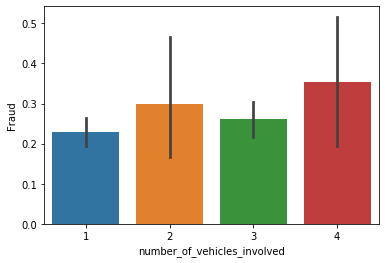

In [171]:
#detecting fraud withrespect to no. of vehicles

sbn.barplot(x='number_of_vehicles_involved',y='Fraud',data=insfrn)

The above plot shows,4 vehicles involved are more compared to others

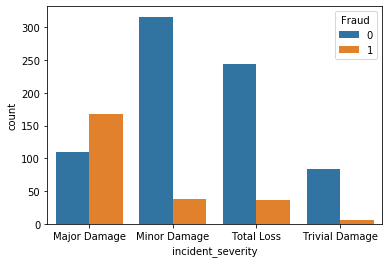

In [173]:
sbn.countplot(x='incident_severity',hue='Fraud',data=insfrn)

the above plot suggests fraud reported is more when there is major damage

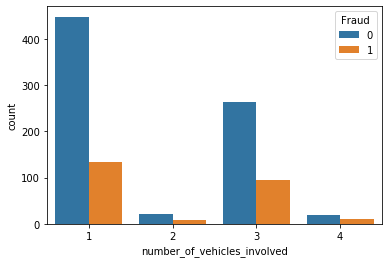

In [174]:
sbn.countplot(x='number_of_vehicles_involved',hue='Fraud',data=insfrn)

The above plot shows fraud reported with respect to no. of vehicles involved

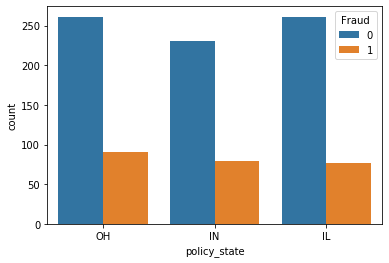

In [175]:
sbn.countplot(x='policy_state',hue='Fraud',data=insfrn)

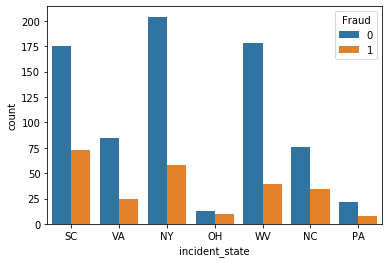

In [176]:
sbn.countplot(x='incident_state',hue='Fraud',data=insfrn)

Fraud report with respect to the incident state

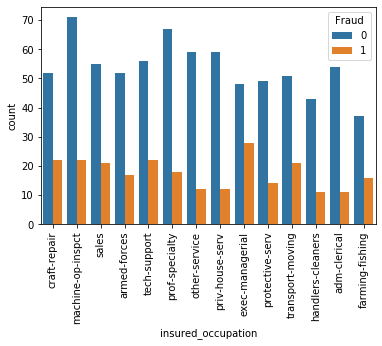

In [179]:
sbn.countplot(x='insured_occupation',hue='Fraud',data=insfrn)
plt.xticks(rotation=90)
plt.show()

The reported fraud is more in exec-managerial

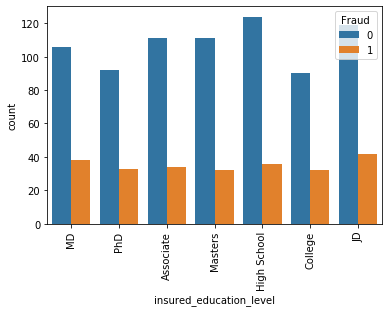

In [182]:
sbn.countplot(x='insured_education_level',hue='Fraud',data=insfrn)
plt.xticks(rotation=90)
plt.show()


In [186]:
insfrn.groupby(['incident_location'])['Fraud'].unique()

incident_location
1012 5th Lane       [1]
1028 Sky Lane       [0]
1030 Pine Lane      [1]
1087 Flute Drive    [0]
1091 1st Drive      [0]
                   ... 
9929 Rock Drive     [1]
9935 4th Drive      [1]
9942 Tree Ave       [1]
9980 Lincoln Ave    [1]
9988 Rock Ridge     [0]
Name: Fraud, Length: 1000, dtype: object

In [187]:
insfrn['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [188]:
#Dropping the columns which are not helpful for the predictions

insfrn=insfrn.drop(['policy_number','incident_location','incident_hour_of_the_day','incident_date','auto_make'],axis=1)

In [189]:
insfrn.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_model,auto_year,Fraud
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,1,2,YES,71610,6510,13020,52080,92x,2004,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,0,NO,5070,780,780,3510,E400,2007,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,2,3,NO,34650,7700,3850,23100,RAM,2007,0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,1,2,NO,63400,6340,6340,50720,Tahoe,2014,1
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,0,1,NO,6500,1300,650,4550,RSX,2009,0


In [190]:
insfrn.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
Fraud                          1.175051
dtype: float64

In [191]:
#Seperating feature set and label..

x=insfrn.drop('Fraud',axis=1)

In [197]:
x=pd.get_dummies(x,drop_first=True)


In [192]:
y=insfrn['Fraud']

In [193]:
y=pd.DataFrame(y,columns=['Fraud'])
y.head()

,Fraud
0,1
1,1
2,0
3,1
4,0


In [198]:
#Scaling the feature set
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x))


In [199]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)


In [200]:
#Selecting the max accuracy,best random state

def accuracy(model,x,y):
    max_acc=0
    for rst in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rst,test_size=.22)
        model.fit(x_train,y_train)
        predy=model.predict(x_test)
        acc=accuracy_score(y_test,predy)
        print('Accuracy is',acc,'for the random state',rst)
        if acc>max_acc:
            max_acc=acc
            f_rst=rst
    print('Maximum accuracy is ',max_acc,'and acquired at',f_rst)
    return f_rst

In [203]:
lor=LogisticRegression()
accuracy(lor,x,y)

Accuracy is 0.7181818181818181 for the random state 40
Accuracy is 0.759090909090909 for the random state 41
Accuracy is 0.7 for the random state 42
Accuracy is 0.7772727272727272 for the random state 43
Accuracy is 0.7863636363636364 for the random state 44
Accuracy is 0.759090909090909 for the random state 45
Accuracy is 0.7681818181818182 for the random state 46
Accuracy is 0.75 for the random state 47
Accuracy is 0.8136363636363636 for the random state 48
Accuracy is 0.7545454545454545 for the random state 49
Accuracy is 0.8181818181818182 for the random state 50
Accuracy is 0.7909090909090909 for the random state 51
Accuracy is 0.8318181818181818 for the random state 52
Accuracy is 0.759090909090909 for the random state 53
Accuracy is 0.740909090909091 for the random state 54
Accuracy is 0.8090909090909091 for the random state 55
Accuracy is 0.7909090909090909 for the random state 56
Accuracy is 0.7818181818181819 for the random state 57
Accuracy is 0.759090909090909 for the rando

52

In [204]:
#Checking decision tree performance
dt=DecisionTreeClassifier()
accuracy(dt,x,y)

Accuracy is 0.7090909090909091 for the random state 40
Accuracy is 0.6227272727272727 for the random state 41
Accuracy is 0.6772727272727272 for the random state 42
Accuracy is 0.65 for the random state 43
Accuracy is 0.6954545454545454 for the random state 44
Accuracy is 0.6954545454545454 for the random state 45
Accuracy is 0.7181818181818181 for the random state 46
Accuracy is 0.7 for the random state 47
Accuracy is 0.7636363636363637 for the random state 48
Accuracy is 0.6909090909090909 for the random state 49
Accuracy is 0.7227272727272728 for the random state 50
Accuracy is 0.7090909090909091 for the random state 51
Accuracy is 0.6909090909090909 for the random state 52
Accuracy is 0.7181818181818181 for the random state 53
Accuracy is 0.7136363636363636 for the random state 54
Accuracy is 0.7818181818181819 for the random state 55
Accuracy is 0.7272727272727273 for the random state 56
Accuracy is 0.7 for the random state 57
Accuracy is 0.7272727272727273 for the random state 58

55

In [208]:
#Performing classification with knn
kn=KNeighborsClassifier(n_neighbors=14)
accuracy(kn,x,y)

Accuracy is 0.7 for the random state 40
Accuracy is 0.6863636363636364 for the random state 41
Accuracy is 0.7227272727272728 for the random state 42
Accuracy is 0.7318181818181818 for the random state 43
Accuracy is 0.7454545454545455 for the random state 44
Accuracy is 0.7454545454545455 for the random state 45
Accuracy is 0.7818181818181819 for the random state 46
Accuracy is 0.7136363636363636 for the random state 47
Accuracy is 0.8090909090909091 for the random state 48
Accuracy is 0.7772727272727272 for the random state 49
Accuracy is 0.759090909090909 for the random state 50
Accuracy is 0.7363636363636363 for the random state 51
Accuracy is 0.7954545454545454 for the random state 52
Accuracy is 0.7318181818181818 for the random state 53
Accuracy is 0.7545454545454545 for the random state 54
Accuracy is 0.7636363636363637 for the random state 55
Accuracy is 0.7727272727272727 for the random state 56
Accuracy is 0.7181818181818181 for the random state 57
Accuracy is 0.75 for the r

48

In [206]:
#Lets check with svc
sv=SVC(kernel='rbf')
accuracy(sv,x,y)

Accuracy is 0.6954545454545454 for the random state 40
Accuracy is 0.6863636363636364 for the random state 41
Accuracy is 0.7136363636363636 for the random state 42
Accuracy is 0.7363636363636363 for the random state 43
Accuracy is 0.7454545454545455 for the random state 44
Accuracy is 0.7454545454545455 for the random state 45
Accuracy is 0.7863636363636364 for the random state 46
Accuracy is 0.7136363636363636 for the random state 47
Accuracy is 0.8090909090909091 for the random state 48
Accuracy is 0.7772727272727272 for the random state 49
Accuracy is 0.759090909090909 for the random state 50
Accuracy is 0.7363636363636363 for the random state 51
Accuracy is 0.8045454545454546 for the random state 52
Accuracy is 0.7363636363636363 for the random state 53
Accuracy is 0.7545454545454545 for the random state 54
Accuracy is 0.759090909090909 for the random state 55
Accuracy is 0.7727272727272727 for the random state 56
Accuracy is 0.7181818181818181 for the random state 57
Accuracy is 

48

In [207]:
kn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
gdk=GridSearchCV(kn,parameters,cv=5,scoring='accuracy')
gdk.fit(x_train,y_train)
gdk.best_params_

{'n_neighbors': 14}

In [209]:
rf=RandomForestClassifier()
parameters={'n_estimators':[10,100,500]}
gsc=GridSearchCV(rf,parameters,cv=5,scoring='accuracy')
gsc.fit(x_train,y_train)
gsc.best_params_

{'n_estimators': 100}

In [210]:
rf=RandomForestClassifier(n_estimators=100)
accuracy(rf,x,y)

Accuracy is 0.7045454545454546 for the random state 40
Accuracy is 0.6909090909090909 for the random state 41
Accuracy is 0.7181818181818181 for the random state 42
Accuracy is 0.7363636363636363 for the random state 43
Accuracy is 0.7545454545454545 for the random state 44
Accuracy is 0.7454545454545455 for the random state 45
Accuracy is 0.8045454545454546 for the random state 46
Accuracy is 0.7045454545454546 for the random state 47
Accuracy is 0.7954545454545454 for the random state 48
Accuracy is 0.7636363636363637 for the random state 49
Accuracy is 0.7545454545454545 for the random state 50
Accuracy is 0.740909090909091 for the random state 51
Accuracy is 0.8136363636363636 for the random state 52
Accuracy is 0.7227272727272728 for the random state 53
Accuracy is 0.7363636363636363 for the random state 54
Accuracy is 0.7818181818181819 for the random state 55
Accuracy is 0.7772727272727272 for the random state 56
Accuracy is 0.7136363636363636 for the random state 57
Accuracy is

52

In [211]:
#Cross validationg the performance of the rfclassifier..

cvs=cross_val_score(rf,x,y,cv=5,scoring='accuracy')
print('mean accuracy of logistic regression is ',cvs.mean())
print('Standard deviation of the model is ',cvs.std())


mean accuracy of logistic regression is  0.7569851496287406
Standard deviation of the model is  0.007184348349941103


In [214]:
#Since random forest is performing better than other models,taking rf into consideration

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=52,test_size=.22)
rf.fit(x_train,y_train)
predy=rf.predict(x_test)
acc=accuracy_score(y_test,predy)
print('Accuracy is ',accuracy_score(y_test,predy))
print('Confusion matrix for the model',confusion_matrix(y_test,predy))
print('Classification report',classification_report(y_test,predy))

Accuracy is  0.8181818181818182
Confusion matrix for the model [[172   4]
 [ 36   8]]
Classification report               precision    recall  f1-score   support

           0       0.83      0.98      0.90       176
           1       0.67      0.18      0.29        44

    accuracy                           0.82       220
   macro avg       0.75      0.58      0.59       220
weighted avg       0.79      0.82      0.77       220



In [216]:
#Saving predictions and the model
prdct=pd.DataFrame(predy,columns=['Fraud'])
prdct=prdct.to_csv('automobileinsfraudpredict.csv',index=False)

In [217]:
#Saving the model
import joblib
joblib.dump(rf,'autoinsfraud.pkl')

['autoinsfraud.pkl']